In [1]:
from spectralradex import radex
import numpy as np
from astropy import units as u 
from astropy import constants as c
from astropy.table import Table
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('paper')

In [2]:
table_hncofits = Table.read('./../data/mopra_fits/final_fits_updated.dat', format='ascii')
colnames_new = ['n_gauss', 'x', 'y', 'Ipeak', 'Ipeak_err', 'Vcent', 'Vcent_err', 'FWHM', 'FWHM_err', 'rms', 'residual', 'chisquared', 'DoF', 'reduced_chisquared', 'AIC']

for colname, colname_new in zip(table_hncofits.colnames, colnames_new): 
    table_hncofits[colname].name = colname_new
table_hncofits

n_gauss,x,y,Ipeak,Ipeak_err,Vcent,Vcent_err,FWHM,FWHM_err,rms,residual,chisquared,DoF,reduced_chisquared,AIC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2.0,1.09169,-0.20139,0.167,0.009,65.703,0.96,33.969,2.432,0.026,190.112,194.0,0.985,202.547,0.024
2.0,1.09169,-0.20139,0.142,0.01,116.254,1.054,29.299,2.613,0.026,190.112,194.0,0.985,202.547,0.024
2.0,1.09169,-0.19306,0.197,0.007,65.585,0.567,32.995,1.374,0.02,237.909,194.0,1.233,250.344,0.02
2.0,1.09169,-0.19306,0.206,0.009,115.756,0.43,20.518,1.028,0.02,237.909,194.0,1.233,250.344,0.02
2.0,1.09169,-0.18472,0.213,0.006,66.868,0.455,33.848,1.086,0.017,344.2,194.0,1.783,356.635,0.021
2.0,1.09169,-0.18472,0.359,0.009,116.352,0.182,15.259,0.43,0.017,344.2,194.0,1.783,356.635,0.021
2.0,1.09169,-0.17639,0.213,0.007,68.84,0.529,33.886,1.264,0.02,222.793,194.0,1.154,235.228,0.02
2.0,1.09169,-0.17639,0.413,0.01,116.71,0.177,14.099,0.418,0.02,222.793,194.0,1.154,235.228,0.02
2.0,1.09169,-0.16806,0.219,0.008,71.799,0.591,32.6,1.436,0.023,178.97,194.0,0.927,191.405,0.022


In [3]:
xmask = (table_hncofits['x']>0.7634) & (table_hncofits['x']<0.859)
ymask = (table_hncofits['y']>-0.2361) & (table_hncofits['y']<-0.1384)
vmask = (table_hncofits['Vcent']>0) & (table_hncofits['Vcent']<70)
table_hncofits_masked = table_hncofits[(xmask&ymask&vmask)]
table_hncofits_masked

n_gauss,x,y,Ipeak,Ipeak_err,Vcent,Vcent_err,FWHM,FWHM_err,rms,residual,chisquared,DoF,reduced_chisquared,AIC
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2.0,0.85836,-0.23472,0.316,0.007,46.294,0.297,28.927,0.713,0.018,765.421,194.0,3.966,777.856,0.032
2.0,0.85836,-0.22639,0.33,0.006,47.271,0.269,32.126,0.663,0.016,990.144,194.0,5.13,1002.579,0.034
2.0,0.85836,-0.21806,0.359,0.006,48.27,0.334,37.682,0.857,0.019,690.717,194.0,3.579,703.152,0.033
2.0,0.85836,-0.20972,0.432,0.006,47.833,0.289,39.573,0.728,0.02,407.835,194.0,2.113,420.27,0.027
2.0,0.85836,-0.20139,0.509,0.006,45.988,0.231,38.903,0.568,0.019,287.624,194.0,1.49,300.059,0.021
2.0,0.85836,-0.19306,0.584,0.006,44.453,0.193,36.851,0.468,0.019,336.198,194.0,1.742,348.633,0.021
3.0,0.85836,-0.18472,0.642,0.006,42.615,0.194,35.912,0.512,0.018,474.311,191.0,2.496,493.258,0.024
2.0,0.85836,-0.17639,0.638,0.006,42.388,0.181,39.18,0.441,0.019,352.855,194.0,1.828,365.29,0.023
3.0,0.85836,-0.16806,0.159,0.029,16.813,2.719,26.426,3.637,0.02,320.819,191.0,1.689,339.767,0.024


(1.1754390000000001, -0.6670389999999999)

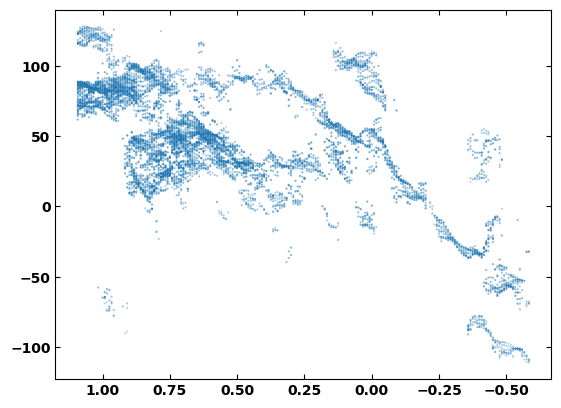

In [4]:
fig, ax = plt.subplots()

s = (table_hncofits['FWHM']**1)*0.01
ax.scatter(table_hncofits['x'], table_hncofits['Vcent'], s=s, alpha=0.5)

ax.set_xlim(ax.get_xlim()[::-1])

(1.09169, -0.58329)

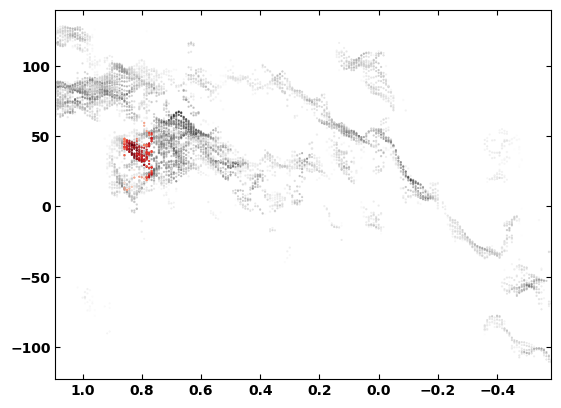

In [5]:
fig, ax = plt.subplots()

s = (table_hncofits['FWHM']**1)*0.01
c = (table_hncofits['Ipeak']**0.05)

s_masked = (table_hncofits_masked['FWHM']**1)*0.01
c_masked = (table_hncofits_masked['Ipeak']**0.05)

ax.scatter(table_hncofits['x'], table_hncofits['Vcent'], s=s,  c=c, cmap='Greys', alpha=0.5)
ax.scatter(table_hncofits_masked['x'], table_hncofits_masked['Vcent'], s=s_masked,  c=c_masked, cmap='Reds', alpha=1)

ax.set_xlim(table_hncofits['x'].max(), table_hncofits['x'].min())

(1.09169, -0.58329)

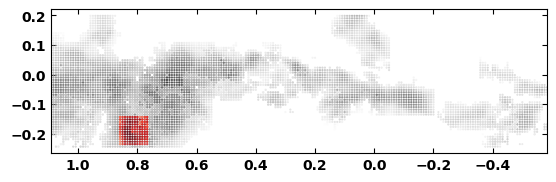

In [6]:
fig, ax = plt.subplots()

ax.set_aspect('equal')

s = (table_hncofits['FWHM']**1)*0.01
c = (table_hncofits['Ipeak']**0.05)

s_masked = (table_hncofits_masked['FWHM']**1)*0.01
c_masked = (table_hncofits_masked['Ipeak']**0.05)

ax.scatter(table_hncofits['x'], table_hncofits['y'], s=s,  c=c, cmap='Greys', alpha=0.75)
ax.scatter(table_hncofits_masked['x'], table_hncofits_masked['y'], s=s_masked,  c=c_masked, cmap='Reds', alpha=1)

ax.set_xlim(table_hncofits['x'].max(), table_hncofits['x'].min())

In [7]:
s = (table_hncofits['FWHM']**1)*0.005
c = (table_hncofits['Ipeak']**0.05)

s_masked = (table_hncofits_masked['FWHM']**1)*0.01
c_masked = (table_hncofits_masked['Ipeak']**0.05)

fig = px.scatter_3d(x=table_hncofits['x'], 
                    y=table_hncofits['y'], z=table_hncofits['Vcent'], 
                    color=c, size=s, color_continuous_scale='Greys', opacity=0.2, 
                    range_x=[table_hncofits['x'].max(), table_hncofits['x'].min()])

width = table_hncofits['x'].max() - table_hncofits['x'].min()
height = table_hncofits['y'].max() - table_hncofits['y'].min()

fig['layout']['scene']['aspectmode'] = "manual"
fig['layout']['scene']['aspectratio'] = dict(x=width/height, y=1, z=1)

fig.update_traces(marker=dict(line=dict(width=0, color='black')),
                  selector=dict(mode='markers'))

fig.write_html("./../figures/mopra_fits.html")


In [8]:
# s = (table_hncofits['FWHM']**1)*0.005
# c = (table_hncofits['Ipeak']**0.05)

# s_masked = (table_hncofits_masked['FWHM']**1)*0.01
# c_masked = (table_hncofits_masked['Ipeak']**0.05)

# fig1 = px.scatter_3d(x=table_hncofits['x'], 
#                      y=table_hncofits['y'], z=table_hncofits['Vcent'], 
#               color=c, size=s, color_continuous_scale='Greys', opacity=0.1, 
#               range_x=[table_hncofits['x'].max(), table_hncofits['x'].min()])

# fig2 = px.scatter_3d(x=table_hncofits_masked['x'], y=table_hncofits_masked['y'], z=table_hncofits_masked['Vcent'], 
#               color=c_masked, size=s_masked, color_continuous_scale='Reds', opacity=0.5, 
#               range_x=[table_hncofits['x'].max(), table_hncofits['x'].min()])

# width = table_hncofits['x'].max() - table_hncofits['x'].min()
# height = table_hncofits['y'].max() - table_hncofits['y'].min()

# fig1['layout']['scene']['aspectmode'] = "manual"
# fig1['layout']['scene']['aspectratio'] = dict(x=width/height, y=1, z=1)

# fig1.update_traces(marker=dict(line=dict(width=0, color='black')),
#                   selector=dict(mode='markers'))

# plotly.plot([fig1,fig2])


In [9]:
# s = (table_hncofits['FWHM']**1)*0.005
# c = (table_hncofits['Ipeak']**0.05)

# s_masked = (table_hncofits_masked['FWHM']**1)*0.01
# c_masked = (table_hncofits_masked['Ipeak']**0.05)

# fig = go.Figure()

# fig.add_scatter3d(x=table_hncofits['x'], 
#                     y=table_hncofits['y'], z=table_hncofits['Vcent'], 
#                     color=c, size=s, color_continuous_scale='Greys', opacity=0.1, 
#                     range_x=[table_hncofits['x'].max(), table_hncofits['x'].min()])